In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tickers = ['IMOEX.ME', '^GSPC', 'PLZL.ME', 'NMM.SG', 'SGOL']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

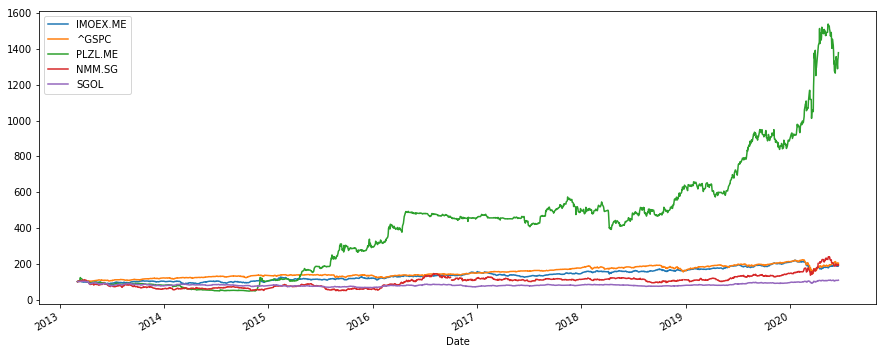

In [3]:
(sec_data / sec_data.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [4]:
ind_returns = (sec_data / sec_data.shift(1)) - 1

In [5]:
annual_ind_returns = ind_returns.mean() * 250 * 100
annual_ind_returns

IMOEX.ME    10.608809
^GSPC       11.934982
PLZL.ME     42.624957
NMM.SG      16.712742
SGOL         2.975776
dtype: float64

In [6]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [7]:
sec_returns.mean() * 250 # Годовая доходность

IMOEX.ME    0.088199
^GSPC       0.104148
PLZL.ME     0.365503
NMM.SG      0.095813
SGOL        0.017815
dtype: float64

In [8]:
sec_returns.mean() * 250 ** 0.5 * 100  # Стандартное отклонение

IMOEX.ME    0.557820
^GSPC       0.658692
PLZL.ME     2.311647
NMM.SG      0.605974
SGOL        0.112672
dtype: float64

In [9]:
cov_matrix = sec_returns.cov()
cov_matrix

,IMOEX.ME,^GSPC,PLZL.ME,NMM.SG,SGOL
IMOEX.ME,0.000143,0.000047,0.000055,0.000038,0.000006
^GSPC,0.000047,0.000122,0.000009,0.000017,-0.000002
PLZL.ME,0.000055,0.000009,0.000480,0.000054,0.000036
NMM.SG,0.000038,0.000017,0.000054,0.000571,0.000121
SGOL,0.000006,-0.000002,0.000036,0.000121,0.000096


In [10]:
corr_matrix = sec_returns.corr()
corr_matrix

,IMOEX.ME,^GSPC,PLZL.ME,NMM.SG,SGOL
IMOEX.ME,1.000000,0.353650,0.211080,0.132024,0.046447
^GSPC,0.353650,1.000000,0.036440,0.065231,-0.023011
PLZL.ME,0.211080,0.036440,1.000000,0.102061,0.166054
NMM.SG,0.132024,0.065231,0.102061,1.000000,0.513533
SGOL,0.046447,-0.023011,0.166054,0.513533,1.000000


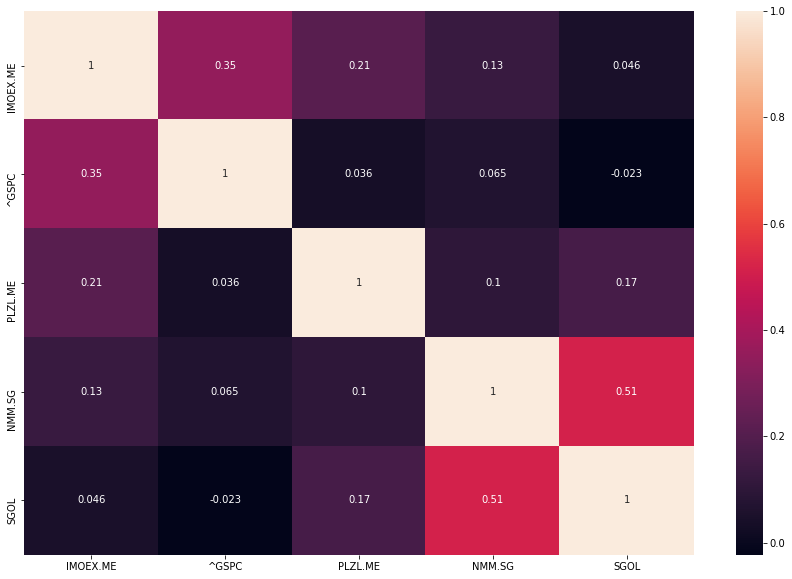

In [11]:
plt.figure(figsize=(15, 10))
sns.heatmap(sec_returns.corr(), annot=True)